<a href="https://colab.research.google.com/github/HighLvRiver/HighLvRiver.github.io/blob/master/AIC_Project1_Jayden_v_Surprise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install scikit-surprise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import surprise
import time


from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from surprise.accuracy import rmse
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

In [0]:
%time train = pd.read_csv("https://www.dropbox.com/s/hp2dn6l6op4n4mv/watcha_aic_train_data_for_problem_1.csv?dl=1")
train.head(10)

CPU times: user 3.38 s, sys: 760 ms, total: 4.14 s
Wall time: 9.85 s


,userId,movieId,preference
0,31231,1193,1.0
1,32077,1284,1.0
2,37618,368,0.0
3,76002,490,1.0
4,79452,2132,0.0
5,128354,2542,0.0
6,68571,190,0.0
7,107371,21,0.0
8,12480,1357,-1.0
9,51994,380,1.0


In [0]:
%time test = pd.read_csv("https://www.dropbox.com/s/0g70q9k7pm5so1n/watcha_aic_test_data_for_problem_1.csv?dl=1")
test.head(10)

CPU times: user 913 ms, sys: 60.1 ms, total: 973 ms
Wall time: 3.43 s


,userId,movieId,preference
0,118853,4232,0.0
1,1734,1701,1.0
2,65850,535,0.0
3,99208,6832,1.0
4,133444,318,1.0
5,36468,3683,1.0
6,78722,1834,0.0
7,9720,262,0.0
8,120385,296,-1.0
9,5348,25,1.0


In [0]:
test.shape

(3992967, 3)

In [0]:
train.shape

(15971866, 3)

In [0]:
# 최종 점수 산정 함수 

def score(ans, pred):
    if ans == 0: 
      return 0
    elif ans == pred: 
      return 1
    else: 
      return -1

In [0]:
# 최대 점수 체크하기 : 2,973,129

# %time test.apply(lambda s: score(s['preference'],s['preference']), axis=1).sum() # 2973129

(array([3083556.,       0.,       0.,       0.,       0., 4125989.,
              0.,       0.,       0., 8762321.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

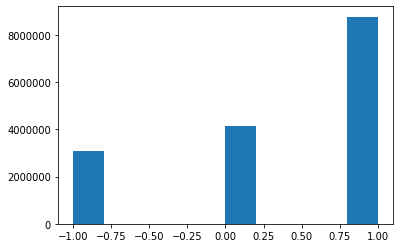

In [0]:
plt.hist(train['preference'])

In [0]:
train['preference'] = train['preference'] + 2
train.head()

,userId,movieId,preference
0,31231,1193,3.0
1,32077,1284,3.0
2,37618,368,2.0
3,76002,490,3.0
4,79452,2132,2.0


In [0]:
test['preference'] = test['preference'] + 2

In [0]:
# sample = train.sample(n=10000, random_state=1)

In [0]:
train = train[train['preference'] != 2]

(array([3083556.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 8762321.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

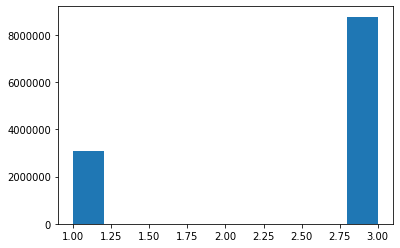

In [0]:
plt.hist(train['preference'])

In [0]:
reader = surprise.Reader(rating_scale=(1,3))

In [0]:
sample_data = surprise.Dataset.load_from_df(sample, reader)

In [0]:
benchmark = []

for algorithm in [SVD(), NMF(), NormalPredictor()
, KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore()
, BaselineOnly(), CoClustering()]:
  results = cross_validate(algorithm, sample_data, measures=['RMSE'], cv=3, verbose=False)

  tmp = pd.DataFrame.from_dict(results).mean(axis=0)
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
  benchmark.append(tmp)

pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.769815,0.474229,0.023278
KNNBaseline,0.770448,1.874829,0.026347
BaselineOnly,0.770455,0.027447,0.021094
KNNBasic,0.784174,1.334953,0.026942
CoClustering,0.805699,1.005465,0.018260
NMF,0.810297,1.066872,0.022195
KNNWithMeans,0.814368,1.312492,0.026884
KNNWithZScore,0.815719,1.498580,0.027549
NormalPredictor,0.998888,0.010478,0.029914


In [0]:
# bsl_option = {'method':'als',
#           'n_epochs':5,
#           'reg_u':12,
#           'reg_i':5    
# }

# train_data = surprise.Dataset.load_from_df(train, reader)
train_data = surprise.Dataset.load_from_df(sample, reader)

In [0]:
start = time.time()
algo = SVD()
algo.fit(train_data.build_full_trainset())
print('Training time(s) :'+str(int(time.time() - start)))

Training time(s) :0


In [0]:
print(algo.__class__.__name__)

SVD


In [0]:
# %time test = pd.read_csv("https://www.dropbox.com/s/0g70q9k7pm5so1n/watcha_aic_test_data_for_problem_1.csv?dl=1")
# test.head(10)

In [0]:
predictions = algo.test(np.array(test))
pred_ratings = np.array([pred.est for pred in predictions])

In [0]:
plt.hist(pred_ratings)

In [0]:
def pred_rat(x):
    if x>2: return 1
    else: return -1

In [0]:
test['pred']=pd.Series(map(pred_rat, pred_ratings))

In [0]:
test['ans']= test.apply(lambda x:score(x['preference'], x['pred']), axis=1)

In [0]:
test.head(10)

,userId,movieId,preference,pred,ans
0,118853,4232,0.0,1,0
1,1734,1701,1.0,1,1
2,65850,535,0.0,1,0
3,99208,6832,1.0,1,1
4,133444,318,1.0,1,1
5,36468,3683,1.0,1,1
6,78722,1834,0.0,1,0
7,9720,262,0.0,1,0
8,120385,296,-1.0,1,-1
9,5348,25,1.0,1,1


In [0]:
np.sum(test['ans'])

1410201

In [0]:
sample = train.sample(frac=0.1, random_state=1)

In [0]:
prediction_test = algo.test(sample)